# Task 1

# 1. Loading the Data:

In [6]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Step 2: Loading the Data
data = pd.read_excel(r"C:\Users\DEB\Desktop\Project 5\telcom_data.xlsx")

pd.set_option('display.max_columns', None)

# Displaying first few rows
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,1823652,208201448079117,33664962239,35521209507511,9164566995485190,42,5,23,44,NaN,NaN,100,0,0,0,100,0,0,0,NaN,NaN,37624,38787,1823652892,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213,214,1545765,24420,1634479,1271433,3563542,137762,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,1365104,208201909211140,33681854413,35794009006359,L77566A,65,5,16,26,NaN,NaN,100,0,0,0,100,0,0,0,NaN,NaN,168,3560,1365104371,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971,1022,1926113,7165,3493924,920172,629046,308339,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,1361762,208200314458056,33760627129,35281510359387,D42335A,NaN,NaN,6,9,NaN,NaN,100,0,0,0,100,0,0,0,NaN,NaN,0,0,1361762651,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751,695,1684053,42224,8535055,1694064,2690151,672973,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,1321509,208201402342131,33750343200,35356610164913,T21824A,NaN,NaN,44,44,NaN,NaN,100,0,0,0,100,0,0,0,NaN,NaN,3330,37882,1321509685,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17,207,644121,13372,9023734,2788027,1439754,631229,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,1089009,208201401415120,33699795932,35407009745539,D88865A,NaN,NaN,6,9,NaN,NaN,100,0,0,0,100,0,0,0,NaN,NaN,0,0,1089009389,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607,604,862600,50188,6248284,1500559,1936496,173853,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589


In [48]:
# DataFrame info
print("\nDataFrame Info:")
data.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9 

## Summary of Data Preparation

In this section, I outlined the steps taken to load and inspect the dataset.

### Process/Steps Taken

1. **Import Libraries**: 
   - Imported necessary libraries: `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.

2. **Loading the Data**: 
   - Loaded the dataset from an Excel file located at `C:\Users\DEB\Desktop\Project 5\telcom_data.xlsx` using `pandas`.

3. **Display Settings**: 
   - Configured pandas to display all columns for better visibility.

4. **Initial Data Inspection**: 
   - Displayed the first few rows of the DataFrame to get an overview of the data.

5. **DataFrame Information**: 
   - Printed information about the DataFrame, including the number of entries, column names, data types, and memory usage.

### Outcome
- The data was successfully loaded, and the structure of the DataFrame was inspected, providing insights into the dataset's contents and format.

# Step 1: Task 1 - User Overview Analysis

# Task 1.1 - User Behavior Overview

In [55]:
def user_behavior_overview(data):
    """Aggregates user behavior information."""
    user_agg = data.groupby('MSISDN/Number').agg(
        num_sessions=('Bearer Id', 'count'),
        total_duration=('Dur. (ms)', 'sum'),
        total_dl_data=('Total DL (Bytes)', 'sum'),
        total_ul_data=('Total UL (Bytes)', 'sum')
    )
    
    # Create a dictionary to store aggregated data per application
    app_data = {}
    app_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                   'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                   'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                   'Google DL (Bytes)', 'Google UL (Bytes)',
                   'Email DL (Bytes)', 'Email UL (Bytes)',
                   'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                   'Other DL (Bytes)', 'Other UL (Bytes)']
    
    for col in app_columns:
        if 'DL' in col:
            app_name = col.replace(' DL (Bytes)', '')
            dl_col = col
            ul_col = col.replace('DL', 'UL')
            app_data[app_name] = data.groupby('MSISDN/Number')[[dl_col, ul_col]].sum()
            
            # Sum DL and UL columns for a single total data volume per application
            app_data[app_name]['total_data_volume'] = app_data[app_name][dl_col] + app_data[app_name][ul_col]
            
            # Rename column for easy access
            app_data[app_name] = app_data[app_name].rename(columns={'total_data_volume': f'{app_name}_total_data_volume'})
            
            # Remove the individual DL/UL columns before merging
            app_data[app_name] = app_data[app_name].drop(columns=[dl_col, ul_col])
    
    # Merge application specific data into user aggregated data
    for app_name, app_df in app_data.items():
        user_agg = user_agg.merge(app_df, on='MSISDN/Number', how='left')
    
    user_agg = user_agg.fillna(0) # Replace NaNs with 0
    return user_agg
    
# Call the user_behavior_overview function
user_agg_data = user_behavior_overview(data)

# Display the result
user_agg_data

,num_sessions,total_duration,total_dl_data,total_ul_data,Social Media_total_data_volume,Youtube_total_data_volume,Netflix_total_data_volume,Google_total_data_volume,Email_total_data_volume,Gaming_total_data_volume,Other_total_data_volume
MSISDN/Number,,,,,,,,,,,
33601001722,1,116720,842637466,36053108,2232135,21624548,27180981,4389005,1331362,812458661,386570872
33601001754,1,181230,120755184,36104459,2660565,12432223,11221763,5334863,3307781,119750078,281710071
33601002511,1,134969,556659663,39306820,3195623,21333570,19353900,3443126,3205380,538827713,501693672
33601007832,1,49878,401993172,20327526,280294,6977321,1942092,9678493,2284670,391126127,35279702
33601008617,2,37104,1363130417,94280527,2912542,41533002,49201724,18499616,3305469,1314797820,804804484
...,...,...,...,...,...,...,...,...,...,...,...
33789996170,1,8810,687925212,26716429,300183,26647843,14902538,7531269,1006915,660361359,295282817
33789997247,1,140988,444575092,35732243,498569,19851572,8531060,5429705,2514097,437003292,211115113
3197020876596,1,877385,194828056,37295915,715224,11959905,26592300,10438660,1520771,178048738,470526473


## Summary of User Behavior Analysis

### Process:
1. **Function Creation**: Developed a function to aggregate user behavior data.
2. **Data Aggregation**:
   - Grouped by `MSISDN/Number` to calculate:
     - **Number of Sessions**: Count of `Bearer Id`.
     - **Total Duration**: Sum of `Dur. (ms)`.
     - **Total Download Data**: Sum of `Total DL (Bytes)`.
     - **Total Upload Data**: Sum of `Total UL (Bytes)`.
3. **Application-Specific Aggregation**:
   - Created a dictionary for applications (e.g., Social Media, YouTube).
   - Summed download (DL) and upload (UL) data.
   - Calculated **Total Data Volume** for each application and merged it into the main dataset.
4. **Data Cleaning**: Replaced NaN values with 0 for clarity.

### Outcome:
- Generated a DataFrame (`user_agg_data`) containing aggregated user metrics, enabling detailed analysis of user engagement across various applications.

# Task 1.2 - Exploratory Data Analysis (EDA)

In [73]:
def exploratory_data_analysis(data, user_agg_data):
    """Performs EDA on the aggregated data."""
    
    # 1. Data Type Description
    data_types = data.dtypes.to_frame('Data Types')
    print("1. Data Types:\n", data_types)
    
# Call the function
exploratory_data_analysis(data, user_agg_data)

1. Data Types:
                                               Data Types
Bearer Id                                         object
Start                                     datetime64[ns]
Start ms                                         float64
End                                       datetime64[ns]
End ms                                           float64
Dur. (ms)                                        float64
IMSI                                             float64
MSISDN/Number                                    float64
IMEI                                             float64
Last Location Name                                object
Avg RTT DL (ms)                                  float64
Avg RTT UL (ms)                                  float64
Avg Bearer TP DL (kbps)                          float64
Avg Bearer TP UL (kbps)                          float64
TCP DL Retrans. Vol (Bytes)                      float64
TCP UL Retrans. Vol (Bytes)                      float64
DL TP < 50 Kbps

In [218]:
# Basic Metrics

print("Basic Metrics:\n")
user_agg_data.describe().transpose()

Basic Metrics:



,count,mean,std,min,25%,50%,75%,max
num_sessions,106856,1,1,1,1,1,2,18
total_duration,106856,146167,186359,7142,71308,102740,172799,18553754
total_dl_data,106856,633652681,464555056,8827082,314827064,570367723,807364490,8156743493
total_ul_data,106856,57309422,35657650,2866892,36395475,46793866,65731993,729577380
Social Media_total_data_volume,106856,2547967,1908038,1563,1211282,2303756,3307509,43374779
Youtube_total_data_volume,106856,31558399,21294918,78903,18631088,26800376,37927976,452958769
Netflix_total_data_volume,106856,31538332,21289557,184569,18555973,26718890,37976957,399519079
Google_total_data_volume,106856,10882434,7544861,40330,5942636,9586153,13214740,152191852
Email_total_data_volume,106856,3148796,2222400,18176,1674481,2799824,3847198,42418782
Gaming_total_data_volume,106856,599769011,449150462,306358,288063112,542349206,777304138,7749432234


In [222]:
# DataFrame for missing values
missing_values_df = pd.DataFrame({
    'Column': data.columns,
    'Missing Values': data.isnull().sum()
})

# Filter to show only columns with missing values
missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]

print("\nMissing Values:")
print(missing_values_df)


Missing Values:
                                    Column  Missing Values
Start                                Start               1
End                                    End               1
Last Location Name      Last Location Name            1153
Handset Manufacturer  Handset Manufacturer             572
Handset Type                  Handset Type             572


In [229]:
# Handle missing data
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype in ['int64', 'float64']:
            # Fill numeric columns with mean
            data[col] = data[col].fillna(data[col].mean())
        elif data[col].dtype == 'object':
            # Fill categorical columns with mode
            data[col] = data[col].fillna(data[col].mode()[0])

# Update missing_values_df after handling
missing_values_df_after = pd.DataFrame({
    'Column': data.columns,
    'Missing Values': data.isnull().sum()
})

# Filter to show only columns with missing values after handling
missing_values_df_after = missing_values_df_after[missing_values_df_after['Missing Values'] > 0]

# Print missing values after handling
print("\nMissing Values After Handling:")
print(missing_values_df_after)


Missing Values After Handling:
      Column  Missing Values
Start  Start               1
End      End               1


In [233]:
# 3. Non-Graphical Univariate Analysis - Dispersion parameters

print("Non-Graphical Univariate Analysis (Dispersion):\n")
for column in user_agg_data.columns:
    print(f"{column}: Std={user_agg_data[column].std():.2f},\n Variance={user_agg_data[column].var():.2f},\n Skew={user_agg_data[column].skew():.2f}")

Non-Graphical Univariate Analysis (Dispersion):

num_sessions: Std=0.81,
 Variance=0.65,
 Skew=3.35
total_duration: Std=186358.67,
 Variance=34729553763.15,
 Skew=20.54
total_dl_data: Std=464555056.46,
 Variance=215811400483492960.00,
 Skew=2.15
total_ul_data: Std=35657649.75,
 Variance=1271467985560659.00,
 Skew=2.90
Social Media_total_data_volume: Std=1908038.04,
 Variance=3640609170313.22,
 Skew=2.09
Youtube_total_data_volume: Std=21294917.68,
 Variance=453473519074735.75,
 Skew=2.54
Netflix_total_data_volume: Std=21289556.97,
 Variance=453245235971982.25,
 Skew=2.48
Google_total_data_volume: Std=7544861.44,
 Variance=56924934100955.69,
 Skew=2.40
Email_total_data_volume: Std=2222400.10,
 Variance=4939062202615.21,
 Skew=2.37
Gaming_total_data_volume: Std=449150462.40,
 Variance=201736137874515232.00,
 Skew=2.07
Other_total_data_volume: Std=448922110.04,
 Variance=201531060886016192.00,
 Skew=2.01
session_duration_decile: Std=1.42,
 Variance=2.01,
 Skew=0.02


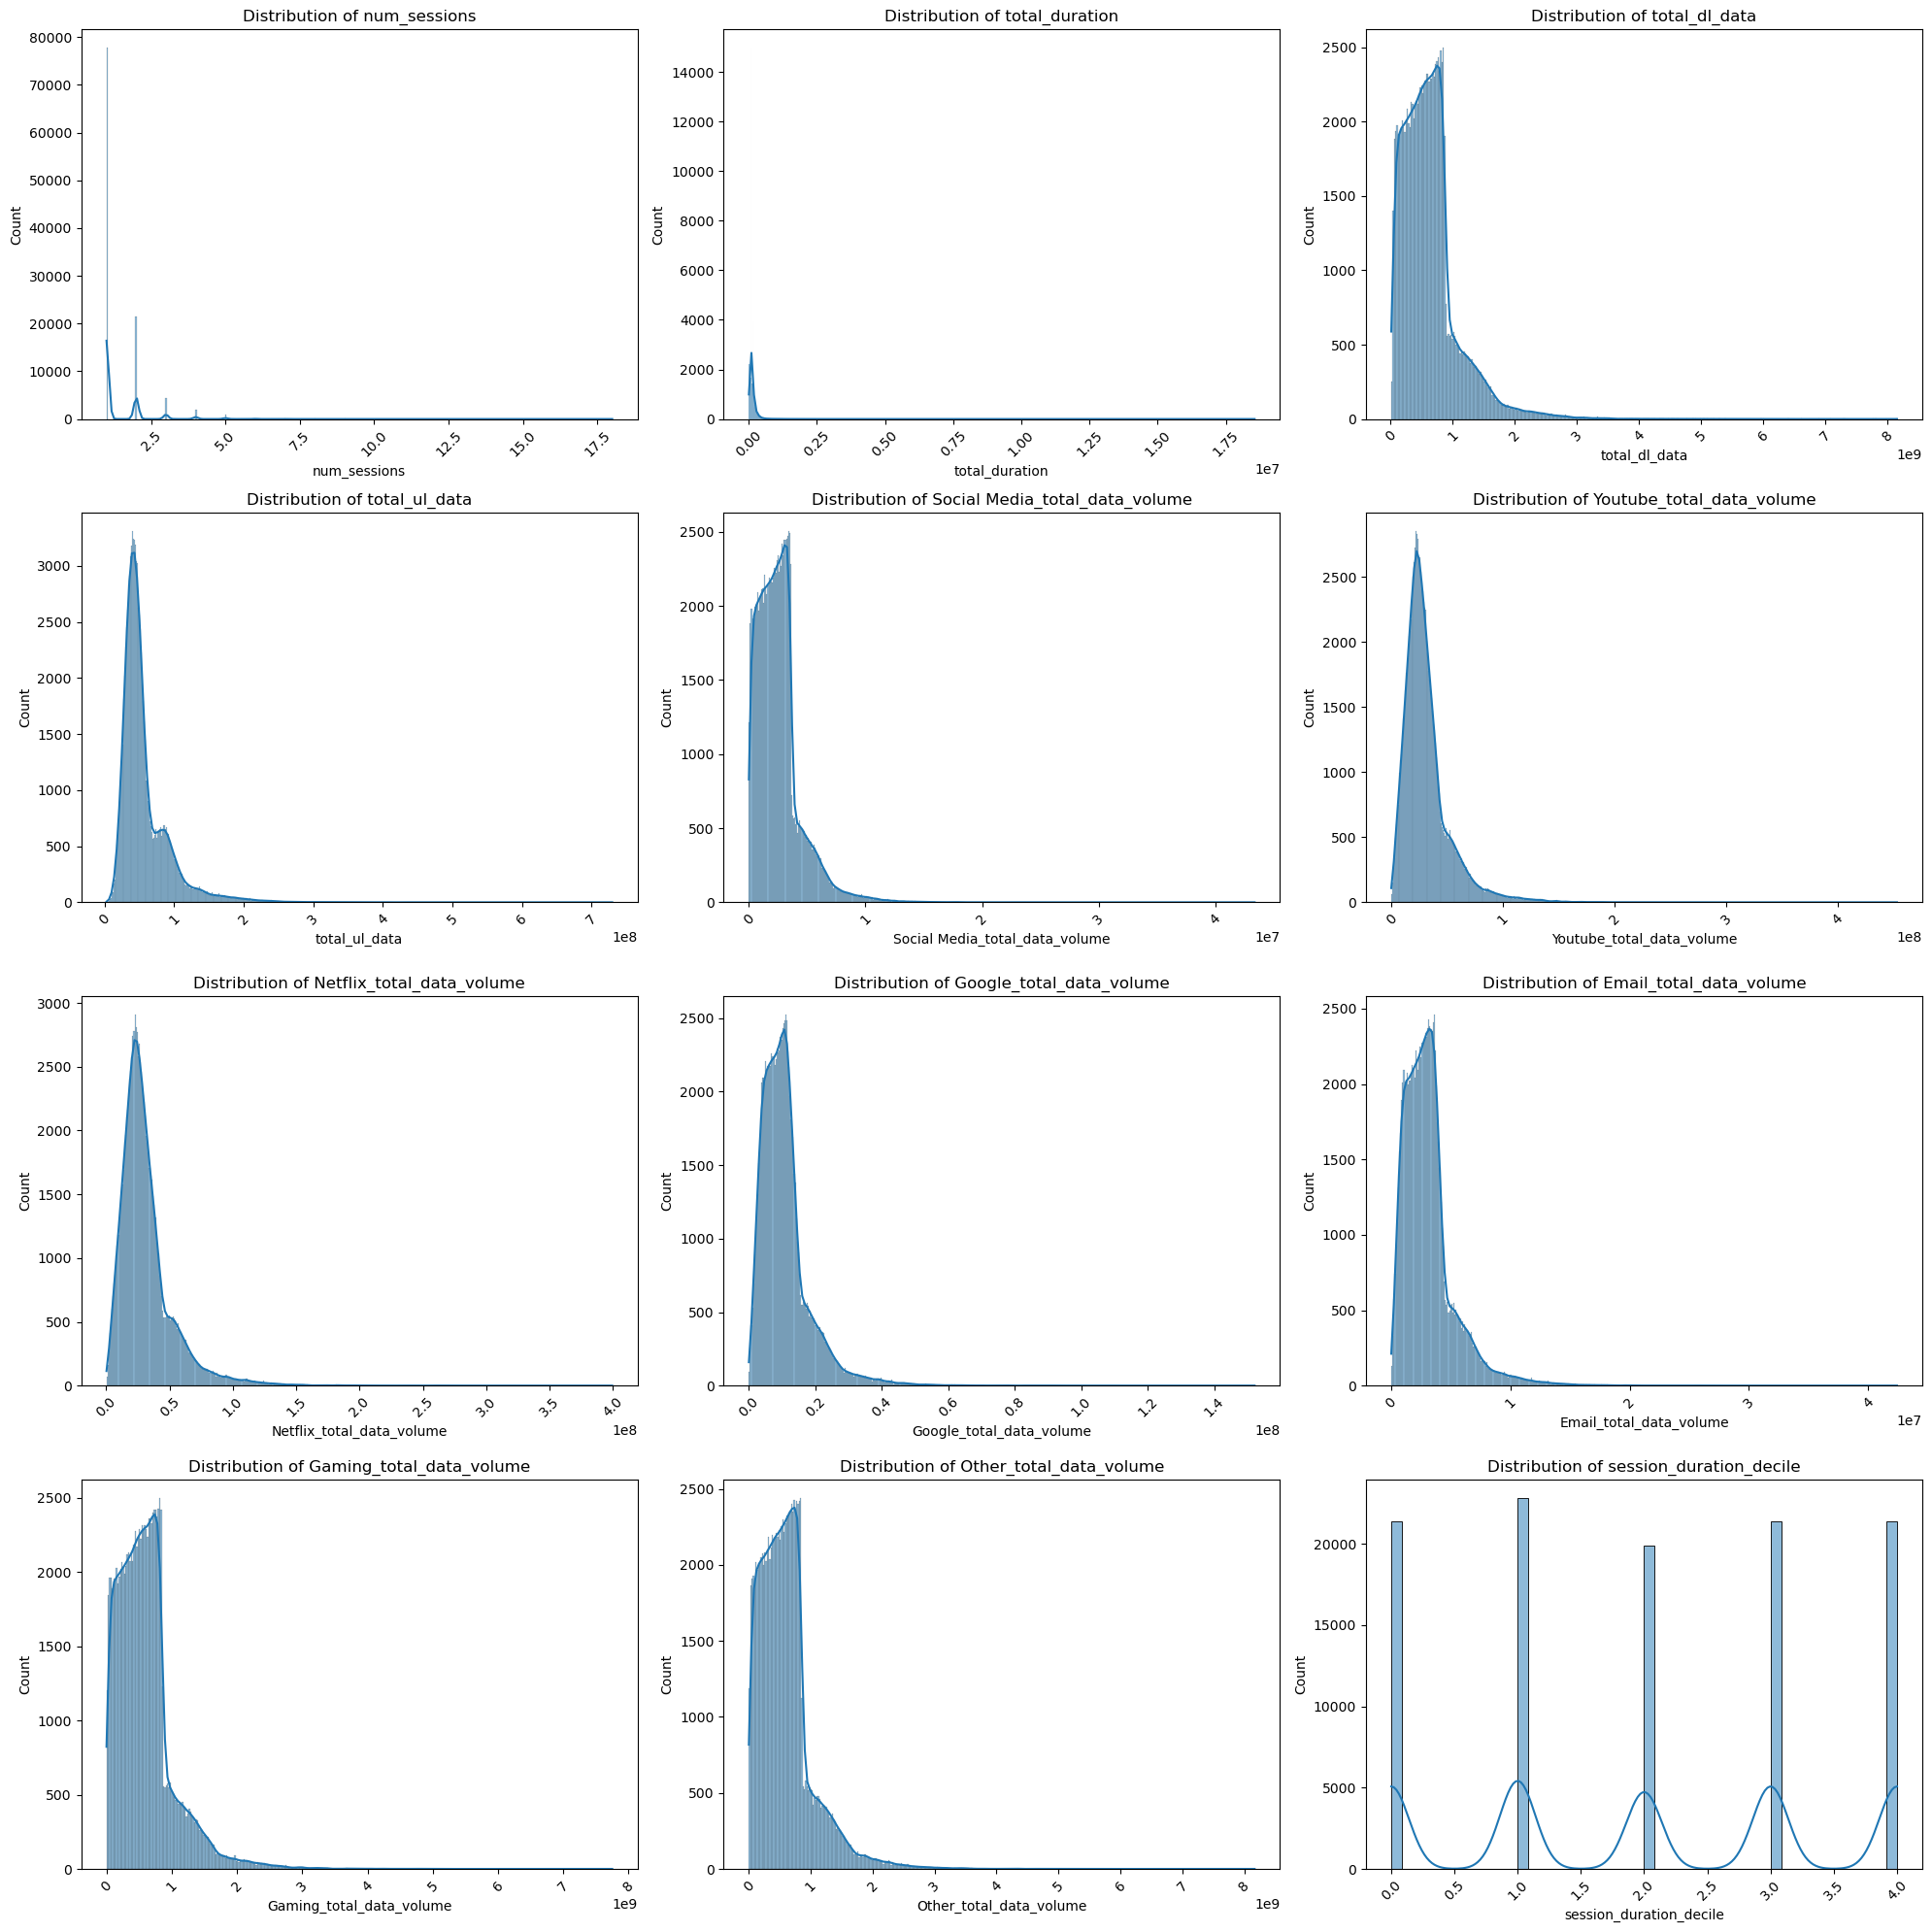

In [237]:
# 4. Graphical Univariate Analysis

numerical_cols = user_agg_data.select_dtypes(include=np.number).columns
rows = (len(numerical_cols) + 2) // 3 
fig, axes = plt.subplots(rows, 3, figsize=(20, 5 * rows))
axes = axes.flatten() # flatten axes object to avoid indexing errors
for i, column in enumerate(numerical_cols):
      sns.histplot(user_agg_data[column], ax=axes[i], kde=True)
      axes[i].set_title(f'Distribution of {column}')
      axes[i].tick_params(axis='x', rotation=45) # Rotate X ticks to avoid overlap
for j in range(i+1, len(axes)):  # hide any unused subplots 
        fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

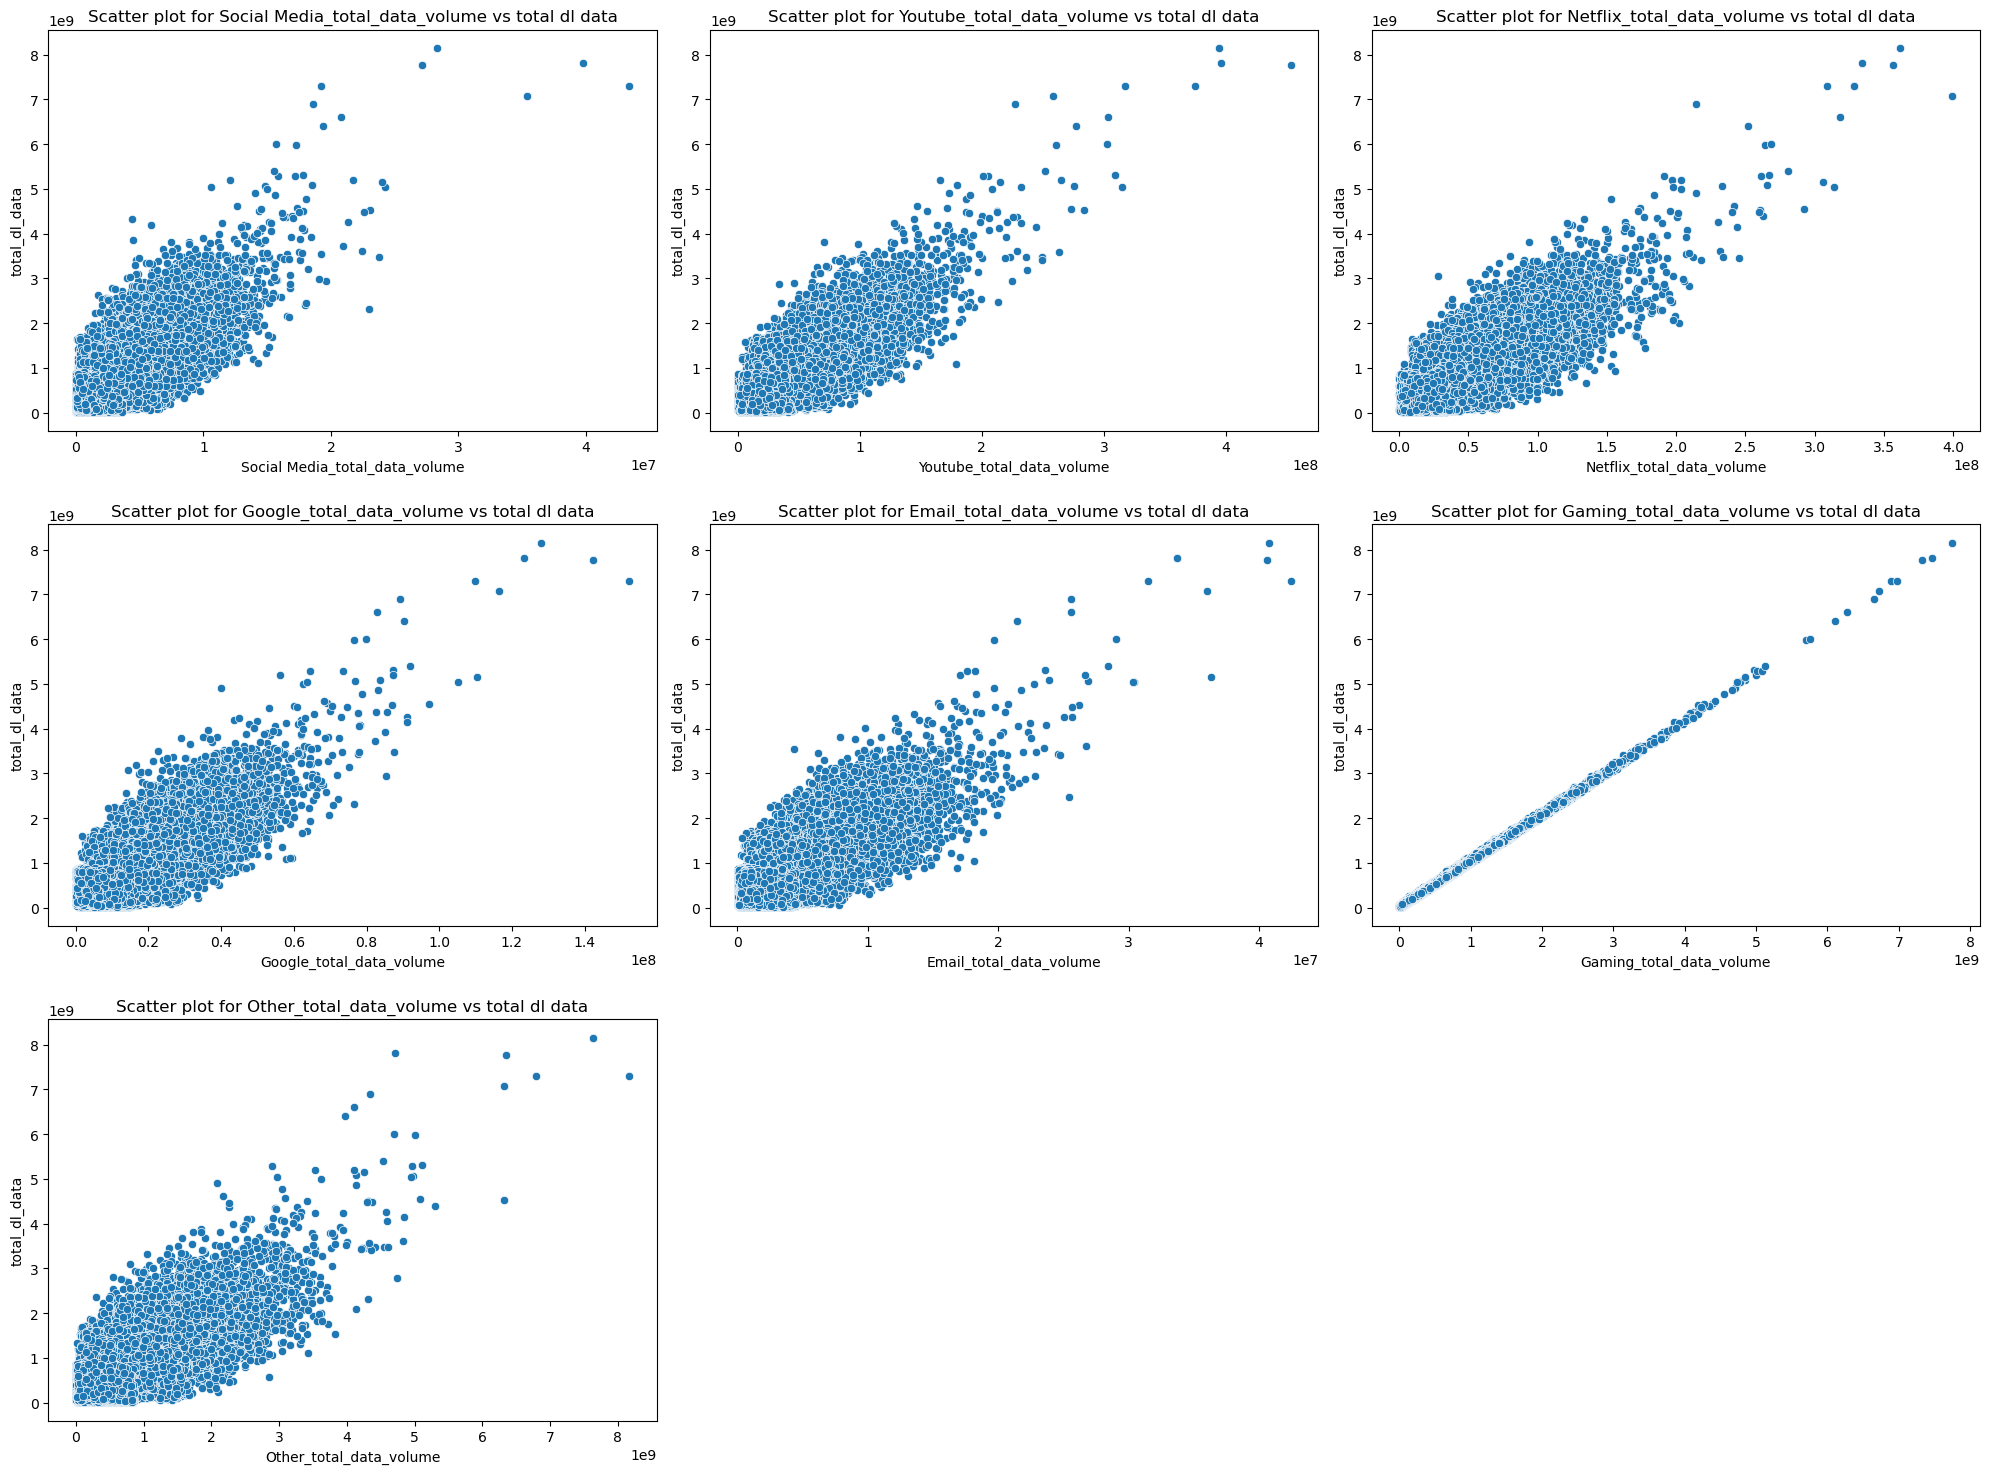

In [239]:
# 5. Bivariate Analysis - Applications vs. Total Data
app_columns = [col for col in user_agg_data.columns if 'total_data_volume' in col]
    
rows = (len(app_columns) + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(20, 5 * rows))
axes = axes.flatten() # flatten axes object to avoid indexing errors
for i, app_col in enumerate(app_columns):
    sns.scatterplot(x=app_col, y='total_dl_data', data=user_agg_data, ax=axes[i])
    axes[i].set_title(f'Scatter plot for {app_col} vs total dl data')
for j in range(i+1, len(axes)):  # hide any unused subplots 
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [243]:
# 6. Variable Transformations - Decile Segmentation
user_agg_data['session_duration_decile'] = pd.qcut(user_agg_data['total_duration'], 5, labels=False)
decile_data = user_agg_data.groupby('session_duration_decile')[['total_dl_data', 'total_ul_data']].sum().reset_index()
print("\n6. Variable Transformations (Decile):\n", decile_data)


6. Variable Transformations (Decile):
    session_duration_decile  total_dl_data  total_ul_data
0                        0 10593944089174   954742960658
1                        1 11526214555358  1044427958832
2                        2 10609465205111   960517754099
3                        3 12816753681013  1157958373734
4                        4 22163213338863  2006208594211


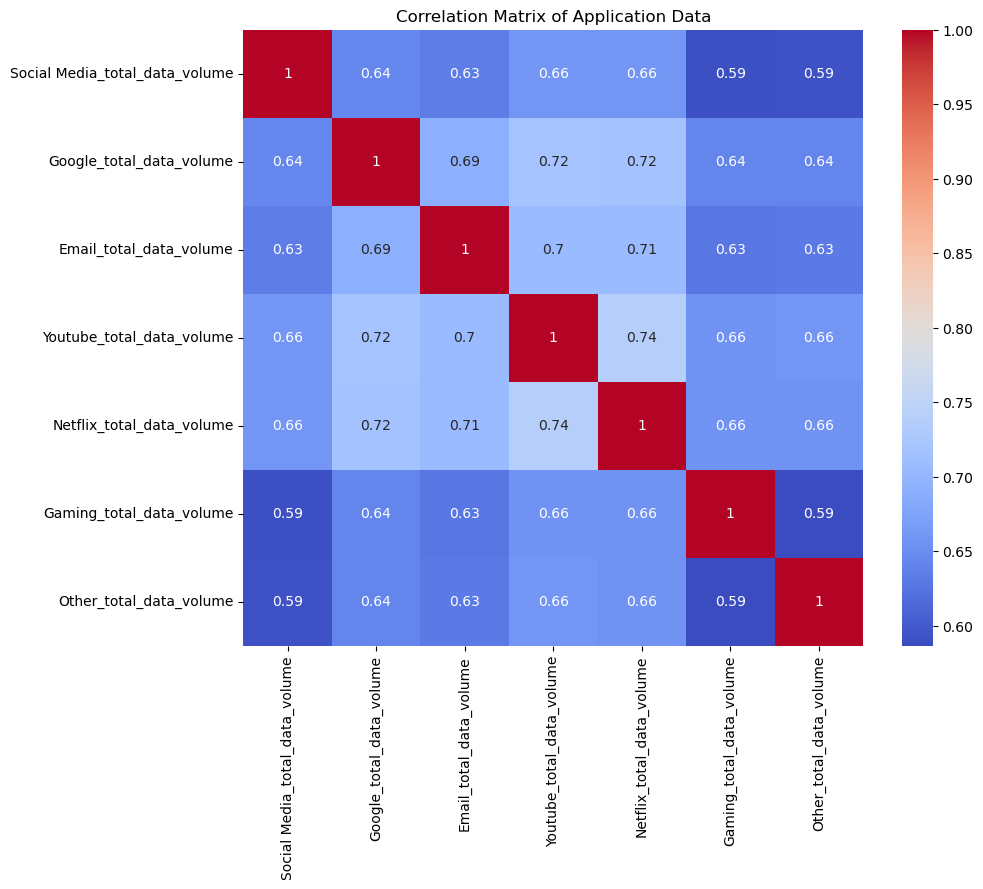

In [245]:
# 7. Correlation Analysis
corr_cols = ['Social Media_total_data_volume', 'Google_total_data_volume',
                 'Email_total_data_volume', 'Youtube_total_data_volume',
                 'Netflix_total_data_volume', 'Gaming_total_data_volume',
                 'Other_total_data_volume']

corr_matrix = user_agg_data[corr_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Application Data')
plt.show()

In [247]:
# 8. Dimensionality Reduction (PCA)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_data = user_agg_data[corr_cols]
pca = PCA(n_components=4)
pca_result = pca.fit_transform(StandardScaler().fit_transform(pca_data))

print("\n8. PCA Results:")
print(f"Explained variance ratio:{pca.explained_variance_ratio_}")
for i in range(pca_result.shape[1]):
    print(f"Component {i+1} variance = {pca.explained_variance_ratio_[i]:.2f} with correlation to the input data = {pca.components_[i]}")


8. PCA Results:
Explained variance ratio:[0.70735526 0.05912166 0.05822164 0.05241703]
Component 1 variance = 0.71 with correlation to the input data = [0.36394873 0.38645523 0.3816128  0.39350841 0.39306382 0.36247746
 0.36308043]
Component 2 variance = 0.06 with correlation to the input data = [-0.12189231  0.00133235 -0.02717151 -0.00939246  0.00866281  0.77312012
 -0.62171071]
Component 3 variance = 0.06 with correlation to the input data = [ 0.79535625 -0.00616648  0.02731422 -0.00725042  0.0117647  -0.29770191
 -0.52707394]
Component 4 variance = 0.05 with correlation to the input data = [-0.46002261  0.31021043  0.49013543  0.20689578  0.2209568  -0.40904963
 -0.43927962]


In [257]:
def identify_top_handsets(data):
    """Identifies top handsets and manufacturers."""
    
#Top 10 Handsets
top_10_handsets = data['Handset Type'].value_counts().nlargest(10).index.tolist()

print("Top 10 Handsets:")
for handset in top_10_handsets:
    print(handset)

Top 10 Handsets:
Huawei B528S-23A
Apple iPhone 6S (A1688)
Apple iPhone 6 (A1586)
undefined
Apple iPhone 7 (A1778)
Apple iPhone Se (A1723)
Apple iPhone 8 (A1905)
Apple iPhone Xr (A2105)
Samsung Galaxy S8 (Sm-G950F)
Apple iPhone X (A1901)


In [265]:
# Mobile Handset type & Handset Manufacturer written as 'undefined'
data[data['Handset Type'] == 'undefined']

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,1321509,208201402342131,33750343200,35356610164913,T21824A,110,18,44,44,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,3330,37882,1321509685,undefined,undefined,990,340,811,149,965,141,17,207,644121,13372,9023734,2788027,1439754,631229,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
5,13114483499779198976,2019-04-12 21:37:31,439,2019-04-25 08:08:09,553,1074638,208201402670191,33668185951,35298410295700,T89132C,110,18,70,54,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,22639,22700,1074638114,undefined,undefined,990,340,811,149,965,141,112,118,3148833,51181,10351530,2582603,1980032,922378,21332918,2611113,7345361,6536448,710293538,13167974,654978277,4436057,30307754,754452212
7,13042425910865399808,2019-04-14 02:11:59,592,2019-04-25 02:26:52,512,951292,208201009069207,33763490140,86546404964017,CELL_208_20_520025_1,39,18,3698,416,19520,759659,99,0,0,0,99,0,0,0,230583,25427,70832,74477,951292920,undefined,undefined,990,3,1,149,2,141,708,666,3103940,57463,1304524,2568189,2987408,512696,12189786,19735183,6858496,12075206,748906189,16149622,537601820,7714657,58813016,775350343
10,7277825610512449536,2019-04-15 10:30:16,90,2019-04-25 06:14:13,775,848637,208209817660342,33665646348,35346810795030,T29911A,110,18,6,9,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,0,0,848637685,undefined,undefined,990,340,811,149,965,141,227,227,2653333,44267,4366381,2166396,3095404,685514,2595678,19385457,16973815,9805785,565283082,9640759,95716749,14831312,56559490,594967693
44,13114483529006100480,2019-04-19 13:39:22,494,2019-04-25 17:19:18,735,531596,208201009919054,33650790507,35586610375241,9164567011283720,110,18,6,9,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,0,0,531596241,undefined,undefined,990,340,811,149,965,141,11,11,2536820,50113,4477936,3626082,2986060,86227,4603491,8419198,15967027,1813522,505264738,11079905,202787389,7532574,32607621,535836072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149952,13114483573366200320,2019-04-29 07:28:22,76,2019-04-30 10:39:30,950,97868,208201545621051,33635520681,35369810460452,T29884C,110,18,60,61,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,28666,30708,97868874,undefined,undefined,990,340,811,149,965,141,122,149,344619,600,2500173,461454,3406718,593415,12653547,6570553,17742755,4143342,332835316,1548721,83156272,5407129,18725214,369483128
149968,13042425979328700416,2019-04-29 07:28:30,131,2019-04-30 07:08:45,257,85215,208201402615080,33650689119,35369810111136,L53329B,303,13,54170,7028,646785,42122,77,5,2,14,97,1,0,0,2301902,456685,7074547,6565506,85215126,unde

In [267]:
#Top 3 Handset Manufacturers
top_3_manufacturers = data['Handset Manufacturer'].value_counts().nlargest(3).index.tolist()

print("Top 3 Handset Manufacturers:")
top_3_manufacturers

Top 3 Handset Manufacturers:


['Apple', 'Samsung', 'Huawei']

In [269]:
#Top 5 Handsets per Top 3 Manufacturer
for manufacturer in top_3_manufacturers:
    top_5_handsets_per_manufacturer = data[data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().nlargest(5)
    print(f"\nTop 5 Handsets of manufacturer {manufacturer}:\n{top_5_handsets_per_manufacturer}")


Top 5 Handsets of manufacturer Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 Handsets of manufacturer Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 Handsets of manufacturer Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [190]:
#Recommendations based on the findings
print("\nRecommendation to Marketing Teams:")
print("1. Focus marketing on devices from the top 3 manufacturers.\n2. Tailor communication to the top 10 Handsets being used.\n3. Prioritize features and app optimization for the listed devices.\n4. Consider targeting offers for top devices to increase customer activity.")


Recommendation to Marketing Teams:
1. Focus marketing on devices from the top 3 manufacturers.
2. Tailor communication to the top 10 Handsets being used.
3. Prioritize features and app optimization for the listed devices.
4. Consider targeting offers for top devices to increase customer activity.


In [277]:
# Checking data before saving the Pre-processed data into a .xlsx file
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,1823652,208201448079117,33664962239,35521209507511,9164566995485190,42,5,23,44,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,37624,38787,1823652892,Samsung,Samsung Galaxy A5 Sm-A520F,990,340,811,149,965,141,213,214,1545765,24420,1634479,1271433,3563542,137762,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,1365104,208201909211140,33681854413,35794009006359,L77566A,65,5,16,26,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,168,3560,1365104371,Samsung,Samsung Galaxy J5 (Sm-J530),990,340,811,149,965,141,971,1022,1926113,7165,3493924,920172,629046,308339,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,1361762,208200314458056,33760627129,35281510359387,D42335A,110,18,6,9,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,0,0,1361762651,Samsung,Samsung Galaxy A8 (2018),990,340,811,149,965,141,751,695,1684053,42224,8535055,1694064,2690151,672973,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,1321509,208201402342131,33750343200,35356610164913,T21824A,110,18,44,44,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,3330,37882,1321509685,undefined,undefined,990,340,811,149,965,141,17,207,644121,13372,9023734,2788027,1439754,631229,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,1089009,208201401415120,33699795932,35407009745539,D88865A,110,18,6,9,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,0,0,1089009389,Samsung,Samsung Sm-G390F,990,340,811,149,965,141,607,604,862600,50188,6248284,1500559,1936496,173853,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589


In [279]:
## Saving Pre-Processed Data to Excel

'''To save the cleaned and pre-processed DataFrame to an Excel file,
I'm using the following command:'''

data.to_excel('pre-processed_data.xlsx', index=False)

In [281]:
# Checking if the file exists in my working directory using Python’s os module:
import os

# Check if the file exists
file_exists = os.path.isfile('pre-processed_data.xlsx')
print(f"File exists: {file_exists}")

File exists: True


In [285]:
# Loading the saved Excel file back into a DataFrame to verify its contents:
import pandas as pd

# Load the saved Excel file
loaded_data = pd.read_excel('pre-processed_data.xlsx')

# Display the first few rows to confirm
loaded_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,1823652,208201448079117,33664962239,35521209507511,9164566995485190,42,5,23,44,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,37624,38787,1823652892,Samsung,Samsung Galaxy A5 Sm-A520F,990,340,811,149,965,141,213,214,1545765,24420,1634479,1271433,3563542,137762,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,1365104,208201909211140,33681854413,35794009006359,L77566A,65,5,16,26,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,168,3560,1365104371,Samsung,Samsung Galaxy J5 (Sm-J530),990,340,811,149,965,141,971,1022,1926113,7165,3493924,920172,629046,308339,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,1361762,208200314458056,33760627129,35281510359387,D42335A,110,18,6,9,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,0,0,1361762651,Samsung,Samsung Galaxy A8 (2018),990,340,811,149,965,141,751,695,1684053,42224,8535055,1694064,2690151,672973,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,1321509,208201402342131,33750343200,35356610164913,T21824A,110,18,44,44,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,3330,37882,1321509685,undefined,undefined,990,340,811,149,965,141,17,207,644121,13372,9023734,2788027,1439754,631229,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,1089009,208201401415120,33699795932,35407009745539,D88865A,110,18,6,9,20809914,759659,100,0,0,0,100,0,0,0,114471024,3242301,0,0,1089009389,Samsung,Samsung Sm-G390F,990,340,811,149,965,141,607,604,862600,50188,6248284,1500559,1936496,173853,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589


In [289]:
# Check for missing values
loaded_data.isnull().sum()

Bearer Id                                   0
Start                                       1
Start ms                                    0
End                                         1
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

## Summary of Exploratory Data Analysis (EDA)

### Process:
1. **Data Type Description**: Identified data types for each column.
2. **Basic Metrics**: Generated descriptive statistics.
3. **Missing Values Handling**: Filled missing values with mean (numeric) and mode (categorical).
4. **Univariate Analysis**: Calculated dispersion parameters (std, variance, skewness).
5. **Graphical Univariate Analysis**:
   - **Histograms**: Showed distribution shapes (e.g., right-skewed for total download data), indicating most users have lower download volumes.
6. **Bivariate Analysis**:
   - **Scatter Plots**: Examined relationships (e.g., Social Media vs. total download data) showing positive correlations, indicating increased usage leads to higher data consumption.
7. **Variable Transformations**: Segmented session durations into deciles, revealing patterns in data usage.
8. **Correlation Analysis**: Created a correlation matrix showing strong relationships (e.g., Social Media and YouTube), useful for targeting marketing strategies.
9. **Dimensionality Reduction (PCA)**: Analyzed variance explained by components, indicating key factors in user behavior.
10. **Handset Analysis**: Identified top handsets and manufacturers.

### Outcome:
- Comprehensive insights on data distributions, relationships, and usage patterns.
- Strategic marketing recommendations based on device and application engagement.
- Successfully saved the cleaned data for future use.

In [ ]:
l